In [1]:
import numpy as np
from random import randint
import pandas as pd
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
import math

# PreProcessing

In [2]:
train_data = pd.read_csv(r'G:\Kaggle\Titanic\train.csv',index_col=False)
test_data = pd.read_csv(r'G:\Kaggle\Titanic\test.csv',index_col=False) 

In [3]:
boys = []
men = []
women = []
girls = []
unwanted = []


In [4]:
    for ind in train_data.index:
        if math.isnan(train_data['Age'][ind])==False:
            name = train_data['Name'][ind]
            if "Mr" in name and train_data['Sex'][ind]=="male" :
                
                men.append(train_data['Age'][ind])
            elif "Master" in name:
#                 
                boys.append(train_data['Age'][ind])
                
            elif "Mr" in name and train_data['Sex'][ind]=="female":
                
                women.append(train_data['Age'][ind])
            else:
                if train_data['Parch'][ind] >1 and train_data['Parch'][ind] <3:
                    
                    girls.append(train_data['Age'][ind])
                else:
                    
                    unwanted.append(train_data['Age'][ind])
                    
    boysAvg = np.array(boys).mean()
    menAvg = np.array(men).mean() 
    womenAvg = np.array(women).mean()
    girlsAvg = np.array(girls).mean()
    unwantedAvg = np.array(unwanted).mean()
    
                    

In [5]:
womenAvg

35.642857142857146

In [6]:
for ind in train_data.index:
    if math.isnan(train_data['Age'][ind]):
        name = train_data['Name'][ind]
        if "Mrs" in name:
            train_data['Age'][ind]=womenAvg
        elif "Master" in name:
            train_data['Age'][ind]=boysAvg
        elif "Mr" in name:
            train_data['Age'][ind]=menAvg
        else:
            if train_data['Parch'][ind] >1 and train_data['Parch'][ind] <3:
                train_data['Age'][ind]=girlsAvg
            else:
                train_data['Age'][ind]=unwantedAvg

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.p

In [7]:
for ind in test_data.index:
    if math.isnan(test_data['Age'][ind]):
        name = test_data['Name'][ind]
        if "Mrs" in name:
            test_data['Age'][ind]=womenAvg
        elif "Master" in name:
            test_data['Age'][ind]=boysAvg
        elif "Mr" in name:
            test_data['Age'][ind]=menAvg
        else:
            if test_data['Parch'][ind] >1 and test_data['Parch'][ind] <3:
                test_data['Age'][ind]=girlsAvg
            else:
                test_data['Age'][ind]=unwantedAvg

C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\LENOVO\Anaconda3\lib\site-packages\ipykernel_launcher.p

In [8]:
passID = test_data['PassengerId']
train_data=train_data.drop(['Name','Ticket','Fare','Cabin','Embarked','PassengerId'],axis=1)
test_data=test_data.drop(['Name','Ticket','Fare','Cabin','Embarked','PassengerId'],axis=1)

In [9]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.000000,1,0
1,1,1,female,38.000000,1,0
2,1,3,female,26.000000,0,0
3,1,1,female,35.000000,1,0
4,0,3,male,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0
887,1,1,female,19.000000,0,0
888,0,3,female,13.387097,1,2
889,1,1,male,26.000000,0,0


In [10]:
#train_data=train_data.dropna(axis=0,how="any", thresh=None, subset=None, inplace=False)
#test_data=test_data.dropna(axis=0,how="any", thresh=None, subset=None, inplace=False)

In [11]:
test_data.head(50)


,Pclass,Sex,Age,SibSp,Parch
0,3,male,34.500000,0,0
1,3,female,47.000000,1,0
2,2,male,62.000000,0,0
3,3,male,27.000000,0,0
4,3,female,22.000000,1,1
5,3,male,14.000000,0,0
6,3,female,30.000000,0,0
7,2,male,26.000000,1,1
8,3,female,18.000000,0,0
9,3,male,21.000000,2,0


In [12]:
train_data['Sex']=np.where(train_data['Sex']=='male',0,1)
test_data['Sex']=np.where(test_data['Sex']=='male',0,1)

In [13]:
train_data


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,0,22.000000,1,0
1,1,1,1,38.000000,1,0
2,1,3,1,26.000000,0,0
3,1,1,1,35.000000,1,0
4,0,3,0,35.000000,0,0
...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0
887,1,1,1,19.000000,0,0
888,0,3,1,13.387097,1,2
889,1,1,0,26.000000,0,0


In [14]:
atrain_lab = train_data['Survived']
train_data = train_data.drop(['Survived'],axis=1)

In [15]:
train_lab = np.array(atrain_lab)
train_data

,Pclass,Sex,Age,SibSp,Parch
0,3,0,22.000000,1,0
1,1,1,38.000000,1,0
2,3,1,26.000000,0,0
3,1,1,35.000000,1,0
4,3,0,35.000000,0,0
...,...,...,...,...,...
886,2,0,27.000000,0,0
887,1,1,19.000000,0,0
888,3,1,13.387097,1,2
889,1,0,26.000000,0,0


In [16]:

scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_data)
scaled_test = scaler.fit_transform(test_data)

In [17]:
scaled_train_samples

array([[1.        , 0.        , 0.27117366, 0.125     , 0.        ],
       [0.        , 1.        , 0.4722292 , 0.125     , 0.        ],
       [1.        , 1.        , 0.32143755, 0.        , 0.        ],
       ...,
       [1.        , 1.        , 0.16294417, 0.125     , 0.33333333],
       [0.        , 0.        , 0.32143755, 0.        , 0.        ],
       [1.        , 0.        , 0.39683338, 0.        , 0.        ]])

# Training

In [18]:
model = Sequential([
    Dense(units=16, input_shape=(5,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=256, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=128, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=64, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_5 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6

In [20]:
model.compile(optimizer=Adam(learning_rate=0.00001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model.fit(x=scaled_train_samples, y=train_lab,validation_split=0.1, batch_size=10, epochs=100, verbose=2)

Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 - 2s - loss: 0.6918 - accuracy: 0.6155 - val_loss: 0.6900 - val_accuracy: 0.6222
Epoch 2/100
801/801 - 0s - loss: 0.6884 - accuracy: 0.6155 - val_loss: 0.6856 - val_accuracy: 0.6222
Epoch 3/100
801/801 - 0s - loss: 0.6829 - accuracy: 0.6804 - val_loss: 0.6780 - val_accuracy: 0.7667
Epoch 4/100
801/801 - 0s - loss: 0.6737 - accuracy: 0.7528 - val_loss: 0.6654 - val_accuracy: 0.8000
Epoch 5/100
801/801 - 0s - loss: 0.6582 - accuracy: 0.7603 - val_loss: 0.6453 - val_accuracy: 0.8000
Epoch 6/100
801/801 - 0s - loss: 0.6331 - accuracy: 0.7690 - val_loss: 0.6120 - val_accuracy: 0.8000
Epoch 7/100
801/801 - 0s - loss: 0.5976 - accuracy: 0.7803 - val_loss: 0.5733 - val_accuracy: 0.8000
Epoch 8/100
801/801 - 0s - loss: 0.5602 - accuracy: 0.7890 - val_loss: 0.5405 - val_accuracy: 0.8000
Epoch 9/100
801/801 - 0s - loss: 0.5293 - accuracy: 0.7978 - val_loss: 0.5180 - val_accuracy: 0.8000
Epoch 10/100
801/801 - 0s - loss: 0.5097 - acc

In [22]:
import matplotlib.pyplot as plt

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

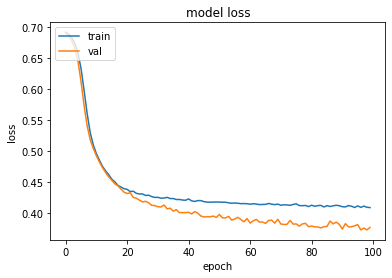

In [23]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Predict

In [24]:
predictions = model.predict(
      x=scaled_test
    , batch_size=10
    , verbose=0
) 

In [53]:
predictions

array([[0.92354316, 0.07645684],
       [0.5125614 , 0.48743862],
       [0.9019646 , 0.09803537],
       [0.88093376, 0.11906628],
       [0.52436095, 0.47563902],
       [0.6480833 , 0.35191673],
       [0.42836812, 0.5716318 ],
       [0.8942413 , 0.10575875],
       [0.2771684 , 0.72283167],
       [0.9168642 , 0.08313575],
       [0.9141582 , 0.08584178],
       [0.6710233 , 0.32897663],
       [0.04409792, 0.95590216],
       [0.9091869 , 0.09081309],
       [0.0424073 , 0.9575927 ],
       [0.06378603, 0.93621397],
       [0.8816986 , 0.11830144],
       [0.8340757 , 0.16592434],
       [0.5024387 , 0.4975613 ],
       [0.43457478, 0.5654252 ],
       [0.6828148 , 0.3171852 ],
       [0.36647663, 0.6335233 ],
       [0.04089573, 0.9591043 ],
       [0.5649417 , 0.4350583 ],
       [0.04288247, 0.95711756],
       [0.95783514, 0.04216492],
       [0.0413801 , 0.95861995],
       [0.8471451 , 0.15285495],
       [0.64667594, 0.35332403],
       [0.9468887 , 0.05311136],
       [0.

In [25]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

0
0
0
0
0
0
1
0
1
0
0
0
1
0
1
1
0
0
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
0
0
0
1
1
0
0
0
0
0
1
0
0
0
1
0
1
1
0
0
1
1
0
1
0
1
0
0
1
0
1
1
0
0
0
0
0
1
1
1
1
1
0
1
0
0
0
1
0
1
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
1
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
0
1
1
0
0
0
0
0
1
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
1
0
1
1
1
0
1
0
0
1
0
1
0
0
0
0
1
0
0
1
0
1
0
1
0
1
0
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
1
0
1
0
1
0
0
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
1
1
1
1
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
1
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
0
0
1
0
0
0
1
1
1
0
1
0
1
1
0
0
0
1
0
1
0
0
0
0
1
1
0
1
0
0
1
1
0
0
1
0
0
1
1
0
0
0
0
0
0
1
1
0
1
0
0
0
0
0
1
0
0
0
1
0
1
0
0
1
0
1
1
0
0
0
0
1
1
1
1
1
0
1
0
0
1


In [26]:
data= {"PassengerId":passID,"Survived":rounded_predictions}
result = pd.DataFrame(data,columns=["PassengerId","Survived"])
result.set_index("PassengerId",inplace=True)

In [27]:
print(type(passID))

<class 'pandas.core.series.Series'>


In [28]:
#result.to_csv(r'G:\Kaggle\Titanic\Submission2.csv')

In [29]:
#model.save(r'G:\Kaggle\Titanic\model1.h5')

# SVM

In [30]:
from sklearn.svm import SVC

In [31]:
SVC_classifier = SVC(C=10.0, gamma=0.05)

In [32]:
SVC_classifier.fit(scaled_train_samples, train_lab)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
svc_preds = SVC_classifier.predict(scaled_test)

In [34]:
svc_data = {"PassengerId":passID, "Survived":svc_preds}
svc_sub = pd.DataFrame(svc_data, columns=["PassengerId", "Survived"])
svc_sub.set_index("PassengerId", inplace=True)

In [35]:
print(svc_preds)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [36]:
#svc_sub.to_csv(r'G:\Kaggle\Titanic\Submission3.csv')

# XGBoost

In [38]:
data_dmatrix = xgb.DMatrix(data=scaled_train_samples,label=train_lab)

In [39]:
xg_reg = xgb.XGBRegressor(objective='reg:linear',colsample_bytree=0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimator=10)

In [40]:
xg_reg.fit(scaled_train_samples,train_lab)

[15:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.
[15:06:28] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { n_estimator } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:06:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.2.0/src/objective/regression_obj.cu:174: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimator=10, n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=10, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [41]:
pred = xg_reg.predict(scaled_test)

In [68]:
rounded_predictions = np.around(pred)
rounded_predictions

array([1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 0.

In [69]:
print(type(rounded_predictions))
print(rounded_predictions.size)

<class 'numpy.ndarray'>
418


In [70]:
svc_data = {"PassengerId":passID, "Survived":rounded_predictions}
svc_sub = pd.DataFrame(svc_data, columns=["PassengerId", "Survived"])
svc_sub.set_index("PassengerId", inplace=True)

In [72]:
svc_sub.to_csv(r'G:\Kaggle\Titanic\Submission5.csv')